# 데이터 요약
train 데이터 구성: 2700명의 7개의 사진(18,900개의 데이터)  
eval 데이터 구성: 12600개의 사진(1800명의 7개 사진으로 추측)  

# train.csv 구성
 -  id: 사용에 큰 의미 없으므로 삭제해서 진행하기  
 - gender: 남,녀 두가지 클래스 존재  
 - race: 아시아인 하나만 존재하기 때문에 삭제해도 되는 것으로 여겨짐  
 - age: 43개의 나이가 존재  
 - path: 이미지 주소  
 =>gedner, race, age에는 null 값이 존재하지 않음
 
## age 관련 EDA 결과
 - age: 원데이터 입력을 사용하면 U자형의 데이터 분포를 보여줌  
 - c_age: age데이터를 카테고리로 변경하여 시각화한 결과 60세 이상의 데이터가 다른 데이터들과 달리 수가 적음
   (1281개, 1227개, 192개) -> (47.4%, 45.4%, 7.1%)로 60세 이상의 데이터가 턱없이 적음
   
## gender 관련 EDA 결과
 - 여성데이터: 1658
 - 남성데이터: 1042
 
## gender & c_age 관련 EDA 결과
 - 30대 미만 -> 총계: 1,272명 남성: 540명, 여성: 732명 (42.4%, 57.5%)
 - 30대 이상 60대 미만 -> 총계: 1227명 남성: 410명, 여성: 817명(33.4%, 66.5%)
 - 60대 이상 -> 총계: 192명 남성: 83명, 여성: 109명(43.2%, 56.7%)

In [1]:
#사용 목적: loc을 통한 데이터 변형을 원 데이터에 적용하면 warning 발생
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('input/data/train/train.csv')
eval = pd.read_csv('input/data/eval/info.csv')

In [4]:
train_path= 'input/data/train/images/'
eval_path= 'input/data/eval/images/'

In [5]:
train.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [6]:
train.shape #2,700*7 = 18,900

(2700, 5)

In [7]:
eval.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0


In [8]:
eval.shape #12600

(12600, 2)

In [9]:
if 'path' in train.columns: 
    path = train['path']
    train = train.drop(['id', 'path'], axis = 1)

print(train)
for col in train.columns:
    print(train[col].unique())

      gender   race  age
0     female  Asian   45
1     female  Asian   52
2       male  Asian   54
3     female  Asian   58
4     female  Asian   59
...      ...    ...  ...
2695    male  Asian   19
2696    male  Asian   19
2697    male  Asian   19
2698    male  Asian   20
2699    male  Asian   19

[2700 rows x 3 columns]
['female' 'male']
['Asian']
[45 52 54 58 59 56 57 55 50 49 53 51 40 25 48 29 35 37 19 42 24 23 30 18
 22 26 21 27 60 20 28 44 34 39 43 33 41 47 46 36 38 32 31]


In [10]:
train.isnull().sum()

gender    0
race      0
age       0
dtype: int64

In [11]:
#train['age'].value_counts()

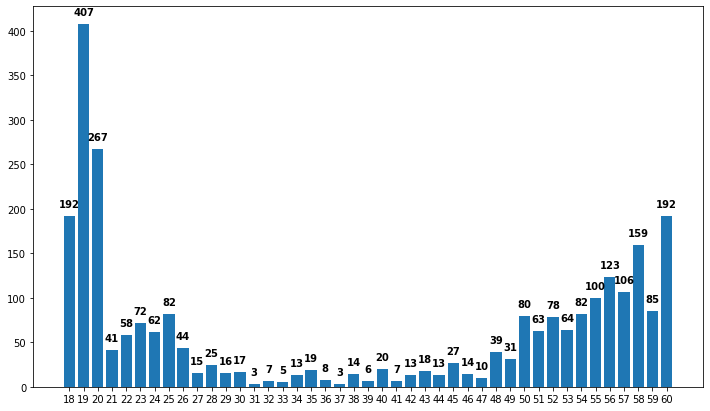

In [12]:
fig, axes = plt.subplots(1,1, figsize =(12,7))
axes.bar(train['age'].value_counts().index, train['age'].value_counts())
axes.set_xticks(train.age.unique())
for idx, value in zip(train['age'].value_counts().index, train['age'].value_counts()):
    axes.text(idx, value+10, s=value, ha = 'center', fontweight ='bold')
plt.show()

In [13]:
#loc을 통해 age의 값을 카테고리 범주로 변환
train['c_age'] = train.age
train.c_age.loc[train.c_age < 30] = 0
train.c_age.loc[(train.c_age >= 30) & (train.c_age < 60)] = 1
train.c_age.loc[train.c_age >= 60] = 2

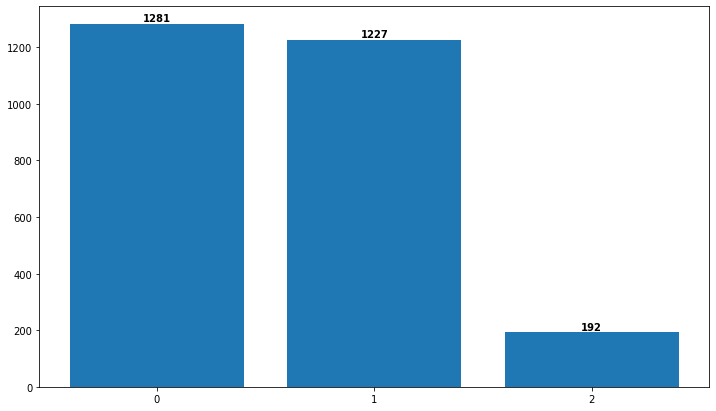

In [14]:
fig, axes = plt.subplots(1,1, figsize =(12,7))
axes.bar(train['c_age'].value_counts().index, train['c_age'].value_counts())
axes.set_xticks(train['c_age'].unique())
for idx, value in zip(train['c_age'].value_counts().index, train['c_age'].value_counts()):
    axes.text(idx, value+10, s=value, ha = 'center', fontweight ='bold')
plt.show()

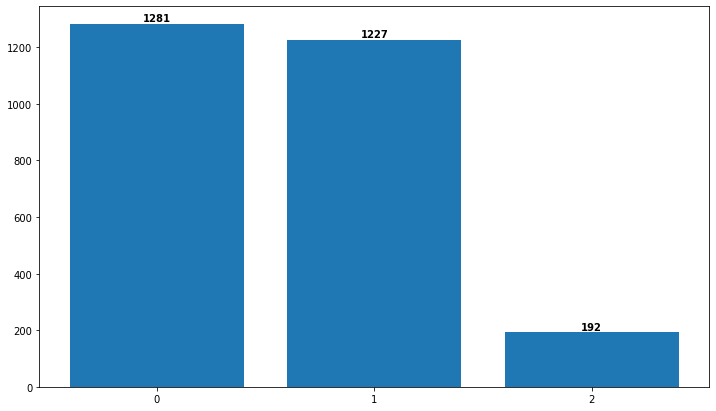

In [15]:
fig, axes = plt.subplots(1,1, figsize =(12,7))
axes.bar(train['c_age'].value_counts().index, train['c_age'].value_counts())
axes.set_xticks(train['c_age'].unique())
for idx, value in zip(train['c_age'].value_counts().index, train['c_age'].value_counts()):
    axes.text(idx, value+10, s=value, ha = 'center', fontweight ='bold')
plt.show()

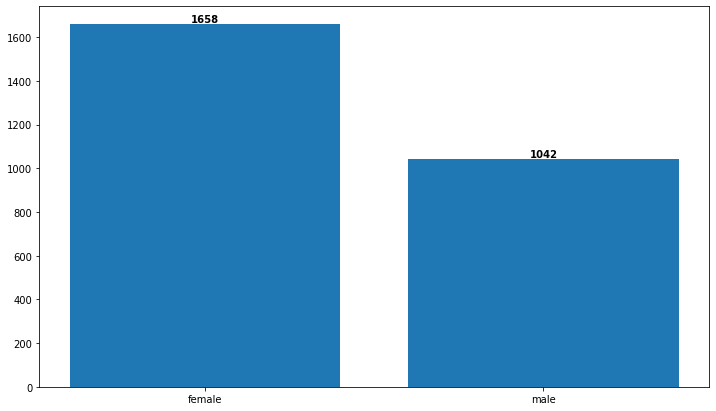

In [16]:
fig, axes = plt.subplots(1,1, figsize =(12,7))
axes.bar(train['gender'].value_counts().index, train['gender'].value_counts())
axes.set_xticks(train['gender'].unique())
for idx, value in zip(train['gender'].value_counts().index, train['gender'].value_counts()):
    axes.text(idx, value+10, s=value, ha = 'center', fontweight ='bold')
plt.show()

In [19]:
train['c_age'].loc[train['gender']== 'female'].value_counts()

1    817
0    732
2    109
Name: c_age, dtype: int64

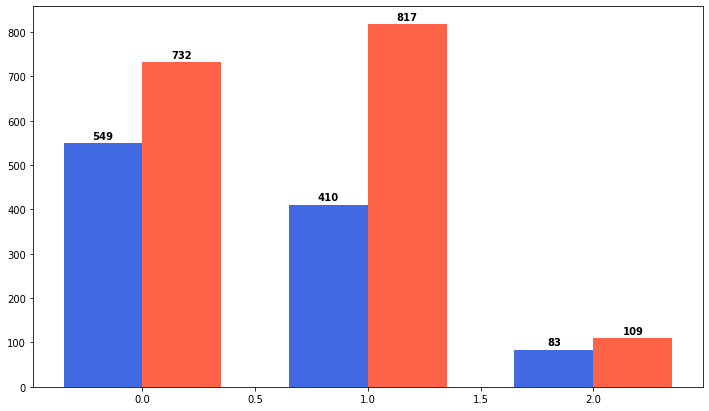

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

width=0.35

ax.bar(train['c_age'].loc[train['gender']== 'male'].value_counts().index-width/2, train['c_age'].loc[train['gender']== 'male'].value_counts(), 
       color='royalblue',
       width=width)

    
ax.bar(train['c_age'].loc[train['gender'] == 'female'].value_counts().index+width/2, train['c_age'].loc[train['gender'] == 'female'].value_counts(), 
       color='tomato',
       width=width)
for idx, value in zip(train['c_age'].loc[train['gender']== 'male'].value_counts().index, train['c_age'].loc[train['gender']== 'male'].value_counts()):
    ax.text(idx-width/2, value+10, s=value, ha = 'center', fontweight ='bold')

for idx, value in zip(train['c_age'].loc[train['gender'] == 'female'].value_counts().index, train['c_age'].loc[train['gender']== 'female'].value_counts()):
    ax.text(idx+width/2, value+10, s=value, ha = 'center', fontweight ='bold')

#ax.set_xticks(train['c_age'].value_counts().index)
#ax.set_xticklabels(train['c_age'])
    
plt.show()